ME200, Johannes Ruf and Luitgard Veraart

# Solutions to Assignment 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

## Exercise 44


Let 
\begin{align*}
	D_1 & = \frac{\log \left(\frac{S_t}{K} \right) + \left(r + \frac{\sigma^2}{2} \right)(T-t)}{\sigma \sqrt{T-t}}, &
	D_2 &= D_1 - \sigma \sqrt{T-t}. 
\end{align*}
We show that  
\begin{align*}
	S_t \varphi (D_1) = K e^{-r(T - t)} \varphi(D_2),  
\end{align*}
where 
 $\varphi(x) = \frac{1}{\sqrt{2 \pi}} \exp(-\frac{x^2}{2})$. 

Proof: 
To see that the statement is true, consider
	\begin{align*}
		\log\left( \frac{\varphi(D_1)}{ \varphi(D_2)}\right) & = \log\left(\frac{\frac{e^{-D_1^2/2}}{\sqrt{2 \pi}}}{\frac{e^{-D_2^2/2}}{\sqrt{2 \pi}}}\right)
		= \log(\exp(\frac{1}{2} (D_2^2 - D_1^2))) \\
		& = \frac{1}{2} (D_2^2 - D_1^2) =  
		\frac{1}{2} (D_2 - D_1)(D_2 + D_1)\\ 
		&= \frac{1}{2} (- \sigma \sqrt{T - t}) (2 D_1 - \sigma \sqrt{T-t})\\
		&= -D_1 \sigma \sqrt{T-t} + \frac{\sigma^2 (T-t)}{2}\\
		&= -\log\left(\frac{S_t}{K}\right) - (r + \frac{\sigma^2}{2})(T-t) + \frac{\sigma^2 (T-t)}{2}\\
		&= \log\left(\frac{K}{S_t}\right) - r (T-t). 
	\end{align*}
	Then we take exponentials on both sides of the equation and obtain 
	\begin{align*}
		\frac{\varphi(D_1)}{\varphi(D_2)} = \exp\left( \log\left(\frac{K}{S_t} \right) - r (T-t) \right)
		= \frac{K}{S_t} \exp(-r(T-t)) 
	\end{align*}
	which is equivalent to 
	\begin{align*}
		S_t \varphi(D_1) = Ke^{-r(T-t)} \varphi(D_2). 
	\end{align*}


## Exercise 45

In [2]:
#Function returning the price of European Call option in Black-Scholes model
def black_scholes_call(S, K, r, tau, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    tmp1 = S * norm.cdf(d1, loc=0, scale=1)
    tmp2 = K * np.exp(-r * tau) * norm.cdf(d2, loc=0, scale=1)
    price = tmp1 - tmp2
    return price


myprice = black_scholes_call(S=50, K=50, r=0.05, tau=1.0, sigma=0.3)
print('Price of European call option is: {:.4f}'.format(myprice))

Price of European call option is: 7.1156


In [3]:
#Function computing implied volatilities using the Bisection method
def impliedvol_bisection(S, K, r, tau, marketprice, a, b, tolerance):
    
    f_a = black_scholes_call(S, K, r, tau, a) - marketprice
    f_b = black_scholes_call(S, K, r, tau, b) - marketprice 
    
    if f_a*f_b >= 0: 
        print("Choose new interval [a, b]!")
        return 
    
    l_n = a
    r_n = b
    
    while (np.abs(r_n-l_n) > tolerance):
        
        f_a = black_scholes_call(S, K, r, tau, l_n) - marketprice
        f_b = black_scholes_call(S, K, r, tau, r_n) - marketprice 
        
        y = (l_n + r_n) / 2
        f_y = black_scholes_call(S, K, r, tau, y) - marketprice 
        
        if f_a * f_y < 0: 
            r_n = y
        elif f_b * f_y < 0: 
            l_n = y
        elif f_y == 0:  
            return y
        else: 
            print("Error in bisection method.")
    return ((r_n + l_n) / 2)
    
iv = impliedvol_bisection(S=50, K=50, r=0.05, tau=1.0, marketprice = 7.11562, a=0.1, b=0.6, tolerance = 0.0000001)
print(iv)

0.29999960064888


In [4]:
# Functions copied from the worksheet for Lecture 12 using the Newton method for comparison
def bs_vega(S, K, r, tau, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))
    vega = S * np.sqrt(tau) * norm.pdf(d1, loc=0, scale=1)
    return vega

def find_impliedvol_Newton(S, K, r, tau, marketprice, initialguess):
    sigmaold = initialguess
    maxiteration = 100
    mydiff = 1
    for i in range(maxiteration):
            callprice = black_scholes_call(S, K, r, tau, sigmaold)
            vega = bs_vega(S, K, r, tau, sigmaold)
            if (vega < 0.000000001):
                return "Error in vega"
            else: 
                sigmanew =  sigmaold - (callprice - marketprice) / vega
                mydiff = np.abs(sigmaold - sigmanew)
                sigmaold = sigmanew
            
            if (mydiff < 0.0000001): 
                return sigmaold
    return "Max iteration reached"

Computation time for Newton method is 0.01595759
Computation time for Bisection method is 0.09425735


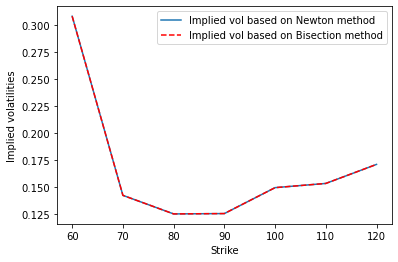

In [5]:
# Example for computing implied volatility

teststrikes = np.array([60, 70, 80, 90, 100, 110, 120])
testprices = np.array([22, 11, 4, 1, 0.4, 0.1, 0.05])
S0=80
testimpliedvols1 = np.zeros(7)
testimpliedvols2 = np.zeros(7)

# Computing implied volatities using Newton's method        
start = time.time()
for i in range(teststrikes.size):
    testimpliedvols1[i] = find_impliedvol_Newton(S=S0, K=teststrikes[i], r=0.0, tau=1.0, marketprice=testprices[i], initialguess=0.5)
runtime = time.time()-start
print('Computation time for Newton method is {:.8f}'.format(runtime))

# Computing implied volatities using Bisection method   
start = time.time()
for i in range(teststrikes.size):
    testimpliedvols2[i] = impliedvol_bisection(S=S0, K=teststrikes[i], r=0.0, tau=1.0, marketprice = testprices[i], a=0.00001, b=0.5, tolerance = 0.000000001)
runtime = time.time()-start
print('Computation time for Bisection method is {:.8f}'.format(runtime))
        
# Plotting implied volatilities   
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(teststrikes, testimpliedvols1, label="Implied vol based on Newton method")
ax.plot(teststrikes, testimpliedvols2, color="red", linestyle="dashed", label="Implied vol based on Bisection method")
ax.set_xlabel("Strike")
ax.set_ylabel("Implied volatilities") 
ax.legend(loc="upper right"); 
   

Above we compared the computational time of both methods, and find that the Newton method is faster here, which is an advantage. One possible disadvantage of the Netwon method is that one needs to compute compute the derivative of the function, which is not required for the Bisection method. 